In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from datasets.MackeyGlassDataset import MackeyGlassDataset
import esn
import utils
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
import numpy as np
# import mdp
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Dataset params
sample_length = 1000
n_samples = 40
batch_size = 5

# Mackey glass dataset
mackey_glass_dataset = MackeyGlassDataset(sample_length, n_samples, tau=30)

# Data loader
dataloader = DataLoader(mackey_glass_dataset, batch_size=5, shuffle=False, num_workers=2)

# ESN properties
input_dim = 1
n_hidden = 20
w_sparsity=0.1

n_iterations = 50

In [12]:
# Model Definition
model = esn.ESN(
    input_dim=input_dim,
    hidden_dim=n_hidden,
    output_dim=1,
    w_sparsity=w_sparsity,
    feedbacks=True
)

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Objective function
criterion = nn.MSELoss()

In [15]:
for i_iter in range(n_iterations):
    # Iterate through batches
    for i_batch, sample_batched in enumerate(dataloader):
        # For each sample
        for i_sample in range(sample_batched.size()[0]):
            optimizer.zero_grad()
            # Inputs and outputs
            inputs = Variable(sample_batched[i_sample][:-1], requires_grad=False)
            outputs = Variable(sample_batched[i_sample][1:], requires_grad=False)
            esn_outputs = torch.zeros(sample_length-1, 1)
            gradients = torch.zeros(sample_length-1, 1)

            # Null loss
            loss = 0

            outs = model(inputs, outputs).view(-1, 1)
            # Add loss
            loss = criterion((F.tanh(outs)), outputs)
            
            # Loss
            loss.backward()
            optimizer.step()

            # Show the graph only for last sample of iteration
            #if i_batch == len(dataloader) - 1 and i_sample == len(sample_batched) -1 :
            """plt.plot(inputs.data.numpy(), c='b')
            plt.plot(outputs.data.numpy(), c='lightblue')
            plt.plot(esn_outputs.numpy(), c='r')
            plt.show()"""
#     print(u"Iteration {}, loss {}".format(i_iter, loss.data[0]))

input:  torch.Size([999, 1])
outputs:  torch.Size([999, 1])


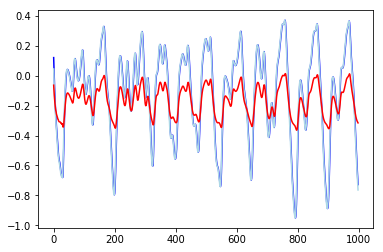

In [14]:
for i_iter in range(n_iterations):
    # Iterate through batches
    for i_batch, sample_batched in enumerate(dataloader):
        # For each sample
        for i_sample in range(sample_batched.size()[0]):
            # Inputs and outputs
            inputs = Variable(sample_batched[i_sample][:-1], requires_grad=False)
            outputs = Variable(sample_batched[i_sample][1:], requires_grad=False)

            # Null loss
            loss = 0
            print("input: ", inputs.size())
            print("outputs: ", outputs.size())
            out = model(inputs, outputs).view(-1, 1)
            out = F.tanh(out)
            plt.plot(inputs.data.numpy(), c='b')
            plt.plot(outputs.data.numpy(), c='lightblue')
            plt.plot(out.data.numpy(), c='r')
            plt.show()
            break
        break
    break
    print(u"Iteration {}, loss {}".format(i_iter, loss.data[0]))